## Introduction

We'll be discussing Convolutional Neural Networks (Convnets and CNNs), using one to classify dogs and cats.

The Convolutional Neural Network gained popularity through its use with image data, and is currently the state of the art for detecting what an image is, or what is contained in the image.

The basic CNN structure is as follows: Convolution -> Pooling -> Convolution -> Pooling -> Fully Connected Layer -> Output

Convolution is the act of taking the original data, and creating feature maps from it.Pooling is down-sampling, most often in the form of "max-pooling," where we select a region, and then take the maximum value in that region, and that becomes the new value for the entire region. Fully Connected Layers are typical neural networks, where all nodes are "fully connected." The convolutional layers are not fully connected like a traditional neural network.

More at the tutorial [here](https://pythonprogramming.net/convolutional-neural-network-deep-learning-python-tensorflow-keras/?completed=/loading-custom-data-deep-learning-python-tensorflow-keras/)

## Part 1: creating the training data for the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os # for accessing files in the directory
import cv2 # for image operations (pip install opencv-python)

Data was downloaded from Microsofts dataset that consists of 12,500 cat pictures and 12,500 dog pictures.
The data can be found [here](https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765)

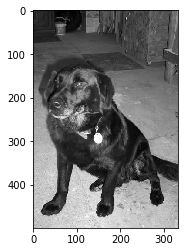

In [2]:
DATADIR = '/Users/simado/Desktop/data/PetImages'

CATEGORIES = ['Dog','Cat']

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
# This is just to check out the data

In [4]:
# This is how our data looks in numbers
print(img_array)

[[ 41  42  43 ... 123 138 135]
 [ 39  40  41 ... 133 143 136]
 [ 40  41  41 ... 139 145 135]
 ...
 [207 194 213 ... 207 198 188]
 [203 190 212 ... 202 191 184]
 [172 168 204 ... 195 182 179]]


So that's a 500 tall, 333 wide, and 3-channel image. 3-channel is because it's RGB (color). We definitely don't want the images that big, but also various images are different shapes, and this is also a problem. The problem with the images are that their sizes varies. We need to normalize that (if possible).

In [5]:
print(img_array.shape)

(500, 333)


### Deciding the shape

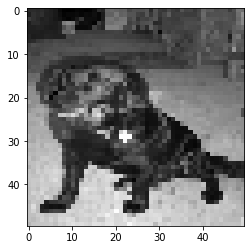

In [6]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

That's a bit blurry I'd say. Let's go with 150x150.

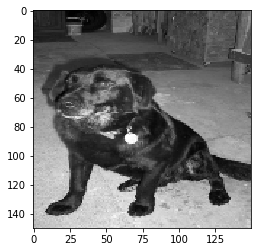

In [7]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

### Once decided on our size, let's build the training data

In [9]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
# At this point we already have the features (pictures), next thing is that we need to map them to their according
# labels(classifications). We need to map the categories to a numerical values - it can't be 'Dog' or 'Cat'. We need
# to assign numeric values to 'Dog' and 'Cat' to be 1 or 0.
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in os.listdir(path):  # iterate over each image per dogs and cats
# Since not all the images are viable, we'll use the Try method:
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
# In some cases you would want to print test errors to fix them, but we now, that some pictures are broken
# and can't be used, so'll we just pass.
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

24946


We always need to make sure that the dataset is balanced. For example, there are 50% dogs and 50% cats in total.
When the amount is not balanced, we can then tell the model (after training it) that there are different class weights:
* cats 35%
* dogs 65%

In [14]:
training_data[4]

[array([[183, 183, 182, ..., 207, 134, 206],
        [185, 183, 184, ..., 143, 179, 221],
        [182, 183, 185, ..., 180, 151, 207],
        ...,
        [101, 108, 118, ...,  79,  86,  96],
        [107, 114, 112, ...,  85,  88,  95],
        [101, 106, 102, ...,  78,  78,  86]], dtype=uint8),
 0]

Now we need to shuffle the data, because we iterate through the data to iterate dogs first and cats second.
If you'd feed that to the NN will learn to predict dogs, but with cats, it will encounter an error and then he'll
need to keep moving forward and backwards each time predicting. Instead, we can shuffle the data the remove uneccassary patterns.

In [10]:
import random
random.shuffle(training_data)

Checking if the labels work in our dataset:

In [11]:
for sample in training_data[:10]: # first 10
    print(sample[1]) # 0 are the values pair, 1 are categories pair

0
0
1
1
0
1
0
0
0
0


### Packing the variables for the model

In [15]:
x = []
y = []

for features, labels in training_data:
    x.append(features)
    y.append(labels)

# We can't pass a list to NN (especially for features). X has to be a numpy array and we need to reshape it
x = np.array(x).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

### Saving our variables

Sometimes we don't have answers how to do our data right from the start. So instead of loading our dataset each time, we'll want to save it!

In [27]:
import pickle

pickle_out = open('x.pickle', 'wb')
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

To import we'll use the following:

In [1]:
import pickle
# to load our data we'll use:
pickle_in=open('x.pickle', 'rb')
x = pickle.load(pickle_in)

# to load our data we'll use:
pickle_in=open('y.pickle', 'rb')
y = pickle.load(pickle_in)